<h2>Pré-processamento das Imagens</h2>

<p>Nesta célula, carregamos a imagem em escala de cinza usando a função cv2.imread() do OpenCV. A imagem é exibida utilizando matplotlib, para visualização inicial antes do pré-processamento.</p>

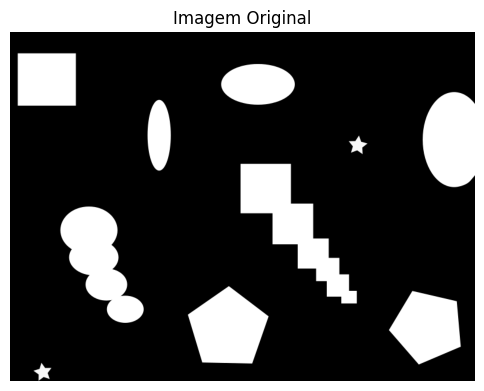

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregando a imagem em escala de cinza
image_path = 'shapes.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Exibindo a imagem original
plt.figure(figsize=(6, 6))
plt.title("Imagem Original")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


<p>Aqui, aplicamos um filtro mediano para suavizar a imagem e reduzir os ruídos. O filtro mediano é útil para preservar as bordas enquanto elimina pequenas imperfeições.</p>

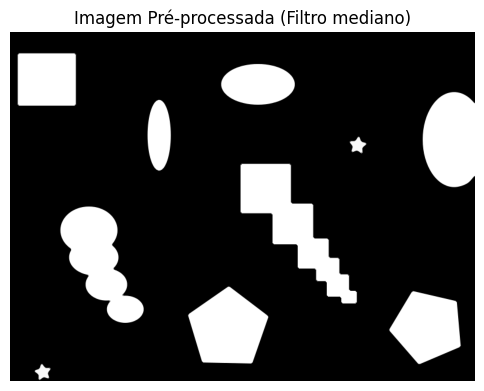

In [2]:
# Aplicando um filtro mediano para reduzir ruídos
blurred_image = cv2.medianBlur(image, 5)

# Exibindo a imagem pré-processada
plt.figure(figsize=(6, 6))
plt.title("Imagem Pré-processada (Filtro mediano)")
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()


<h2>Extração do Fundo</h2>

<p>Nessa célula, usamos a limiarização Otsu para separar automaticamente os objetos do fundo da imagem. Após isso, aplicamos uma operação morfológica de fechamento para conectar pequenos fragmentos de objetos e limpar o resultado da segmentação.</p>
<p>Considerando que a imagem ja esta bem segmentada as operações morfológicas podem não ser cruciais</p>

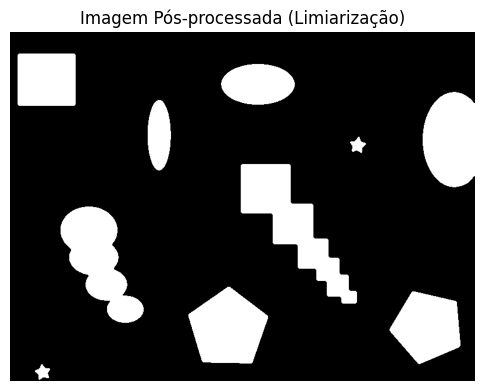

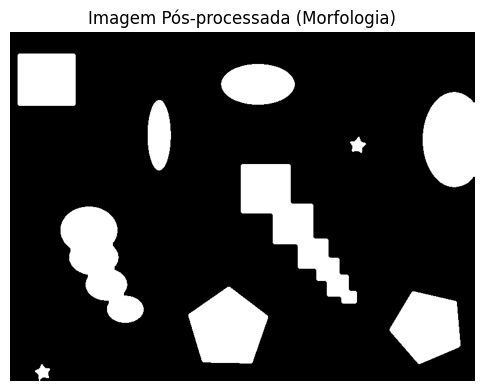

In [3]:
# Aplicando limiarização Otsu para separar os objetos do fundo
_, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.figure(figsize=(6, 6))
plt.title("Imagem Pós-processada (Limiarização)")
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.show()

# Aplicando operações morfológicas para limpar a segmentação
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
cleaned_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel, iterations=2)

# Exibindo a imagem limiarizada e pós-processada
plt.figure(figsize=(6, 6))
plt.title("Imagem Pós-processada (Morfologia)")
plt.imshow(cleaned_image, cmap='gray')
plt.axis('off')
plt.show()

<h2>Segmentação e Contagem de Objetos usando Flood Fill</h2>

<p>Aqui, usamos a função bfs (Busca em Largura) para rotular os objetos conectados na imagem. Cada componente conectado recebe um rótulo único, e o total de objetos segmentados é exibido. A imagem resultante mostra cada objeto rotulado com uma cor diferente.</p>

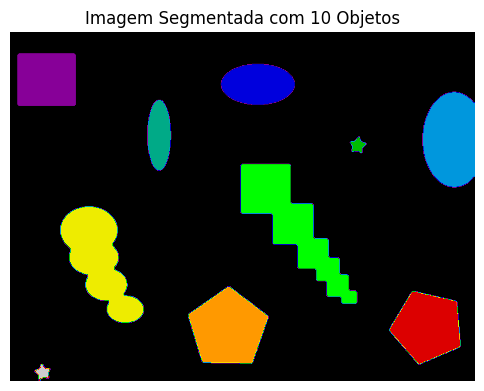

In [4]:
# Inicialize o rótulo e a matriz de labels
label_count = 1
labels = np.zeros_like(cleaned_image)
rows, cols = cleaned_image.shape

def bfs(x, y, label):
    queue = [(x, y)]
    labels[x, y] = label
    while queue:
        cx, cy = queue.pop(0)
        for nx, ny in [(cx+1, cy), (cx-1, cy), (cx, cy+1), (cx, cy-1)]:
            if 0 <= nx < rows and 0 <= ny < cols and cleaned_image[nx, ny] == 255 and labels[nx, ny] == 0:
                labels[nx, ny] = label
                queue.append((nx, ny))

# Percorrer todos os pixels da imagem
for i in range(rows):
    for j in range(cols):
        if cleaned_image[i, j] == 255 and labels[i, j] == 0:
            bfs(i, j, label_count)
            label_count += 1

num_objects = label_count - 1

# Exibindo a imagem rotulada
plt.figure(figsize=(6, 6))
plt.title(f"Imagem Segmentada com {num_objects} Objetos")
plt.imshow(labels, cmap='nipy_spectral')
plt.axis('off')
plt.show()


<h2>Visualização e Cálculo da Área dos Objetos</h2>

<p>Nesta última célula, criamos uma imagem onde cada objeto segmentado é colorido de acordo com sua área relativa, utilizando o espaço de cores HSV. O objetivo é visualizar facilmente cada objeto. Além disso, calculamos e exibimos a área (em pixels) de cada objeto identificado.</p>

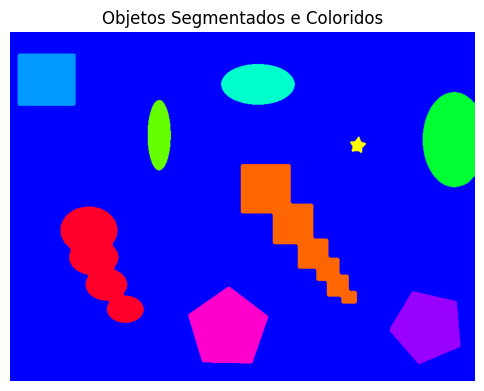

Objeto 1: 8988 pixels
Objeto 2: 6960 pixels
Objeto 3: 12358 pixels
Objeto 4: 3806 pixels
Objeto 5: 417 pixels
Objeto 6: 17024 pixels
Objeto 7: 14431 pixels
Objeto 8: 12690 pixels
Objeto 9: 10582 pixels
Objeto 10: 392 pixels


In [5]:
# Visualizar cada objeto com uma cor diferente e calcular a área
hue_img = np.zeros_like(labels, dtype=np.uint8)
saturation = np.ones_like(labels, dtype=np.uint8) * 255
value = np.ones_like(labels, dtype=np.uint8) * 255

for i in range(1, num_objects + 1):
    hue_value = int(180 * (i / num_objects))
    hue_img[labels == i] = hue_value
    
hsv_img = cv2.merge([hue_img, saturation, value])
color_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

# Exibindo a imagem colorida com os objetos rotulados
plt.figure(figsize=(6, 6))
plt.title("Objetos Segmentados e Coloridos")
plt.imshow(color_img)
plt.axis('off')
plt.show()

# Calculando e exibindo a área de cada objeto
for i in range(1, num_objects + 1):
    area = np.sum(labels == i)
    print(f'Objeto {i}: {area} pixels')